In [1]:
%matplotlib inline

In [2]:
from data import *
from model import *
from view import *

/Users/marinelafargue/PycharmProjects/pythonProject/House-Prices-Project/data.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2['MasVnrArea']=train_2['MasVnrArea'].replace(0.0,train_2['MasVnrArea'].mean())


# house price en MVC pour l'exercice 13

## data

In [3]:
train_2

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
0,208500,7,2003,196.000000
1,181500,6,1976,103.914384
2,223500,7,2002,162.000000
3,140000,7,1970,103.914384
4,250000,8,2000,350.000000
...,...,...,...,...
1455,175000,6,2000,103.914384
1456,210000,6,1988,119.000000
1457,266500,7,2006,103.914384
1458,142125,5,1996,103.914384


In [4]:
train_2.corr()

,SalePrice,OverallQual,YearRemodAdd,MasVnrArea
SalePrice,1.000000,0.790982,0.507101,0.446023
OverallQual,0.790982,1.000000,0.550684,0.360348
YearRemodAdd,0.507101,0.550684,1.000000,0.137394
MasVnrArea,0.446023,0.360348,0.137394,1.000000


## View

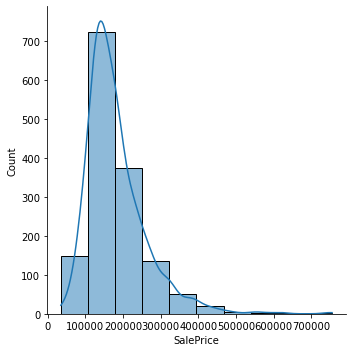

In [5]:
distrib()

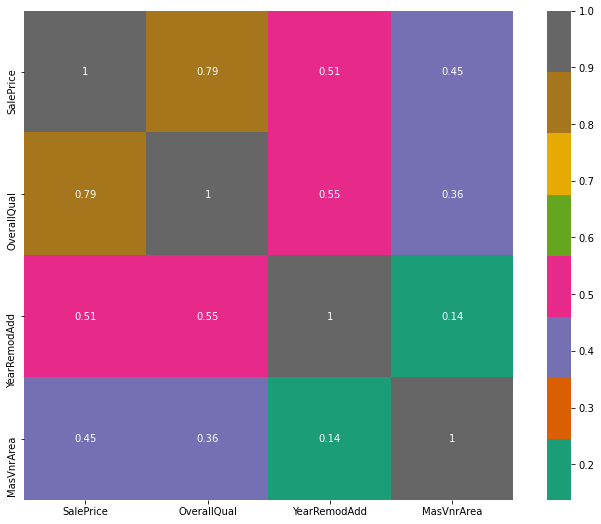

In [6]:
heatmap()

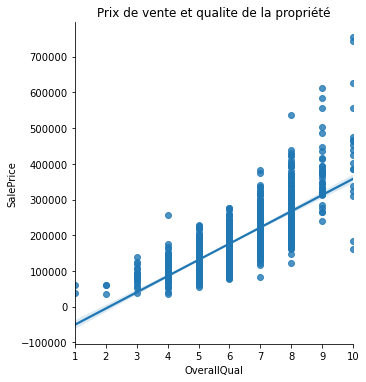

In [7]:
regplot()

## model

### statmodels

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1386.
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        16:27:40   Log-Likelihood:                -17766.
No. Observations:                1460   AIC:                         3.554e+04
Df Residuals:                    1457   BIC:                         3.555e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.901e+04   5561.620    -16.004      0.000   -9.99e+04   -7.81e+04
OverallQual  4.161e+04    946.974     43.936      0.000    3.97e+04    4.35e+04
MasVnrArea     97.6717      8.703     11.223      0.000      80.600     114.743
==============================================================================
Omnibus:                      490.233   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4865.232
Skew:                           1.270   Prob(JB):                         0.00
Kurtosis:                      11.575   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  Intercept     -89009.887464
OverallQual    41606.041472
MasVnrArea        97.671732
dtype: float64
R2:  0.6554390265546517


### programme de prediction du prix par la superficie et la qualite sur 10

In [10]:
print(prediction_mpg(OverallQual=6, MasVnrArea=119.000000))

cette propriété sera vendu entre 112898.91 et 231599.68 selon notre model


### verification de la prediction du model sur l ID: 0

In [11]:
prediction_mpg_one()

 Le prix de la propriete de l'id 0 selon notre model est: 221376.06 au lieu de 208000 dans notre dataframe de base 


### sickit learn

In [12]:
reg.score(X, y)

0.6554390265546517

In [13]:
pred_OverallQual = 7
pred_MasVnrArea = 196.0
reg.predict([[pred_OverallQual, pred_OverallQual]])

print(f" la valeur du prix de la propriété avec l'id 0 est dans mon dataframe de 208500$")
print(f" Avec ma prediction sklearn le prix est de {reg.predict([[pred_OverallQual, pred_OverallQual]])} $")

 la valeur du prix de la propriété avec l'id 0 est dans mon dataframe de 208500$
 Avec ma prediction sklearn le prix est de [202916.10496156] $
